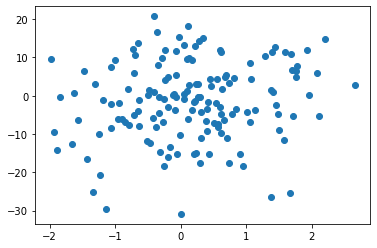

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=150, n_features=1, noise=10)
plt.scatter(X,y)

키 1.8m 일 때 예상 몸무게 - 81.2kg


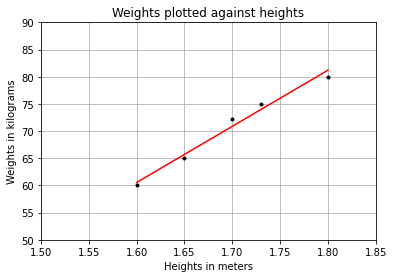

In [13]:
from sklearn.linear_model import LinearRegression

# represents the heights of a group of people in meters
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
# represents the weights of a group of people in kgs
weights = [[60], [65], [72.3], [75], [80]]
plt.title('Weights plotted against heights')
plt.xlabel('Heights in meters')
plt.ylabel('Weights in kilograms')
plt.plot(heights, weights, 'k.')
# axis range for x and y
plt.axis([1.5, 1.85, 50, 90])
plt.grid(True)

# Create and fit the model
model = LinearRegression()
model.fit(X=heights, y=weights)

# plot the regression line
plt.plot(heights, model.predict(heights), color='r')

predh = 1.8
print('키',str(predh)+'m 일 때 예상 몸무게 -',str(round(model.predict([[1.8]])[0][0],2))+'kg')

6.959390903547381
58.33925644426836


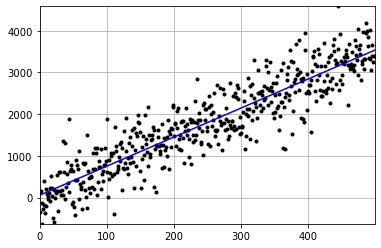

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

x = np.arange(500)
y = 7*x + 20

noise = np.random.normal(0,450,500)
y = y + noise

X = []
y2 = []
for each in x:
    X.append([each])
for each in y:
    y2.append([each])
    
model = LinearRegression()
model.fit(X=X, y=y2)

print(model.coef_[0][0])
print(model.intercept_[0])


plt.axis([min(x), max(x), min(y), max(y)])
plt.grid(True)

plt.plot(x,y,'k.')
plt.plot(x,model.predict(X),color='b')

plt.show()

상관계수행렬 - Correlation Matrix


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000



기울기: 0.20592167891328325
y절편: -1.0443349238990385

CGPA가 6.5 일 때 예측 COA= [[0.29415599]] 



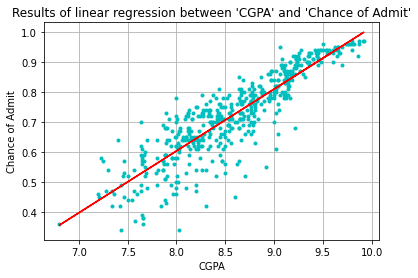

R-squared: 0.78
TSS: 9.94
RSS: 2.20
R-squared: 0.78


In [103]:
import pandas as pd

df = pd.read_csv('admission.csv')
print('상관계수행렬 - Correlation Matrix')
display(df.corr())  # 상관계수행렬

# Chance of Admit과 가장 상관관계 큰 컬럼은 CGPA
# Chance of Admit과 CGPA간의 회귀분석 수행

cgpa = np.array(df['CGPA'].tolist())
coa = np.array(df['Chance of Admit '])

train_cgpa = cgpa.reshape(-1,1)
train_coa = coa.reshape(-1,1)

model = LinearRegression()
model.fit(X=train_cgpa, y=train_coa)

print()
print('기울기:', model.coef_[0][0])
print('y절편:', model.intercept_[0])
print()
pred = [[6.5]]
print('CGPA가',pred[0][0],'일 때 예측 COA=',model.predict(pred),'\n')

# 그래프 초기화
plt.clf()

#plt.axis([min(cgpa), max(cgpa), min(coa), max(coa)])
plt.grid(True)
plt.title("Results of linear regression between 'CGPA' and 'Chance of Admit'")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")

plt.plot(cgpa,coa,'bo', marker='.', color='c')
plt.plot(cgpa, model.predict(train_x), color='r',)

plt.show()

# Model을 통해서 R_squared 값 구하기
print("R-squared: %.2f" % model.score(train_cgpa,train_coa))

# Total Sum of Squares (TSS)
coa_mean = np.mean(np.ravel(train_coa))
TSS = np.sum((np.ravel(train_coa) - coa_mean) ** 2)
print("TSS: %.2f" % TSS)
# Residual Sum of Squares (RSS)
RSS = np.sum((np.ravel(train_coa) - np.ravel(model.predict(train_cgpa))) ** 2)
print("RSS: %.2f" % RSS)
# R_squared
R_squared = 1 - (RSS / TSS)
print("R-squared: %.2f" % R_squared)




In [109]:
import pickle

# save the model to disk
filename = 'COA_CGPA_model.sav'
# write to the file using write and binary mode
pickle.dump(model, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(train_cgpa, train_coa)
print(result)

0.778651952349721


In [111]:
import joblib

# save the model to disk
filename = 'COA_CGPA_model2.sav'
joblib.dump(model, filename)
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(train_cgpa, train_coa)
print(result)

0.778651952349721


<h2>데이터 클렌징 실습</h2>
<br>
** 6x3 행렬을 생성하고 중간에 3개의 셀에 np.nan 값을 설정하고 각 nan이 저장된 셀 값을 해당 컬럼의 평균값으로 대체<br>
** 가장 우측 컬럼의 3,4번째 행에 동일한 100을 입력한다. 3,4번째 행을 조사하여 동일한 값을 가진 경우에는 두 번째 행을 삭제한다


In [132]:
df = pd.DataFrame(np.arange(1,19).reshape(6,3), columns=['A','B','C'])
df.iloc[4,0], df.iloc[1,2], df.iloc[0,1] = np.NaN, np.NaN, np.NaN
df.iloc[3:5,2] = [100,100]

display(df)

# replace all the NaNs
df.A = df.A.fillna(df.A.mean())
df.B = df.B.fillna(df.B.mean())
df.C = df.C.fillna(df.C.mean())
print(round(df.A.mean(),2), df.B.mean(), df.C.mean())
display(df)

df.drop_duplicates(subset='C', keep='first', inplace=True) # remove
display(df)


,A,B,C
0,1.0,NaN,3.0
1,4.0,5.0,NaN
2,7.0,8.0,9.0
3,10.0,11.0,100.0
4,NaN,14.0,100.0
5,16.0,17.0,18.0


7.6 11.0 46.0


,A,B,C
0,1.0,11.0,3.0
1,4.0,5.0,46.0
2,7.0,8.0,9.0
3,10.0,11.0,100.0
4,7.6,14.0,100.0
5,16.0,17.0,18.0


,A,B,C
0,1.0,11.0,3.0
1,4.0,5.0,46.0
2,7.0,8.0,9.0
3,10.0,11.0,100.0
5,16.0,17.0,18.0


<h2>정규화 실습</h2>
<br>
** 무작위 실수로 구성된 4x4 행렬을 준비하고 각 컬럼별로 값을 정규화할 때 0.0~1.0 사이의 숫자로 변환해보세요

In [136]:
from sklearn import preprocessing
df = pd.DataFrame(np.random.uniform(0,10,16).reshape(4,4),columns=['A','B','C','D'])
display(df)

x = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

display(df)

,A,B,C,D
0,5.819573,1.549122,6.234177,3.703317
1,4.594745,8.939446,8.000075,8.900617
2,7.736851,8.149642,4.951472,6.150214
3,3.004473,7.085935,3.104473,1.847886


,A,B,C,D
0,0.594860,0.000000,0.639289,0.263080
1,0.336041,1.000000,1.000000,1.000000
2,1.000000,0.893130,0.377277,0.610023
3,0.000000,0.749198,0.000000,0.000000
